# Correlations Matrix of All Datasets


Heatmaps are plotted using [Seaborn](https://seaborn.pydata.org/index.html), which may require installation, or an update if value annotations fail to render:

```shell
pip install seaborn --upgrade
```


In [1]:
import pandas as pd
import correlation as cr
import cryptoprices as cp
import stockprices as sp
import metalfutures as mf
import cpivalues as cv
import fedinterest as fi

In [2]:
# Cryptocurrencies
btc_prices_df = cp.get_btc_prices_by_date_df()
eth_prices_df = cp.get_eth_prices_by_date_df()

# Stocks
nasdaq_df = sp.get_nasdaq_by_date_df()
sp500_df = sp.get_sp500_by_date_df()

# Precious Metals
gold_futures_df = mf.get_gold_futures_by_date_df()
silver_futures_df = mf.get_silver_futures_by_date_df()

# Consumer Price Index (CPI)
cpi_df = cv.get_cpi_by_date_df()

# Federal interest rates
fed_interest_rate_df = fi.get_fed_interest_rate_by_date_df()

# NP: CPI and fed interest are on a monthly period rather than daily. A second
#     correlation is calculated with monthly data to compare with these
#     datasets.

In [3]:
combined_daily_df = (
    pd.merge(
        btc_prices_df["Close"].rename("BTC Close"),
        eth_prices_df["Price"].rename("ETH Price"),
        how="inner",
        left_index=True,
        right_index=True,
    )
    .merge(
        nasdaq_df["Close/Last"].rename("NASDAQ Close"),
        how="inner",
        left_index=True,
        right_index=True,
    )
    .merge(
        sp500_df["Close/Last"].rename("S&P 500 Close"),
        how="inner",
        left_index=True,
        right_index=True,
    )
    .merge(
        gold_futures_df["close"].rename("Gold Futures Close"),
        how="inner",
        left_index=True,
        right_index=True,
    )
    .merge(
        silver_futures_df["close"].rename("Silver Futures Close"),
        how="inner",
        left_index=True,
        right_index=True,
    )
)
combined_daily_corr = cr.corr_triangle(combined_daily_df.corr())

In [4]:
combined_monthly_df = combined_daily_df.merge(
    cpi_df["Value"].rename("CPI"), how="inner", left_index=True, right_index=True
).merge(
    fed_interest_rate_df["FEDFUNDS"].rename("Fed Interest Rate"),
    how="inner",
    left_index=True,
    right_index=True,
)
combined_monthly_corr = cr.corr_triangle(combined_monthly_df.corr())

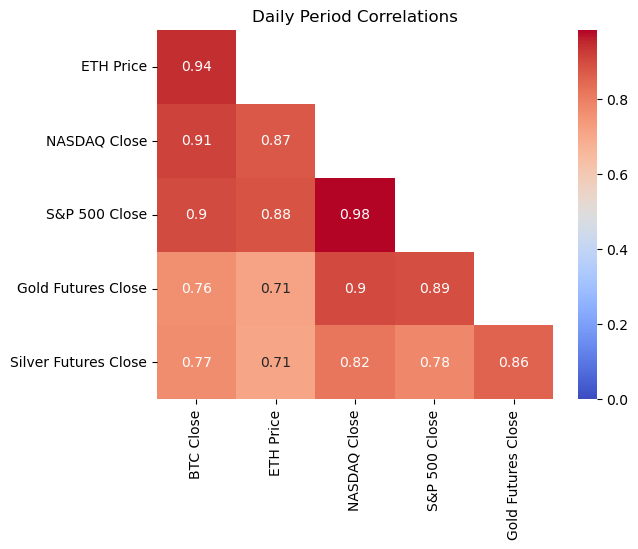

In [5]:
# use iloc to skip empty row & col from corr_triangle
cr.corr_heatmap(
    combined_daily_corr.iloc[1:, :-1],
    "Daily Period Correlations",
    vmin=0,
    cmap="coolwarm",
)

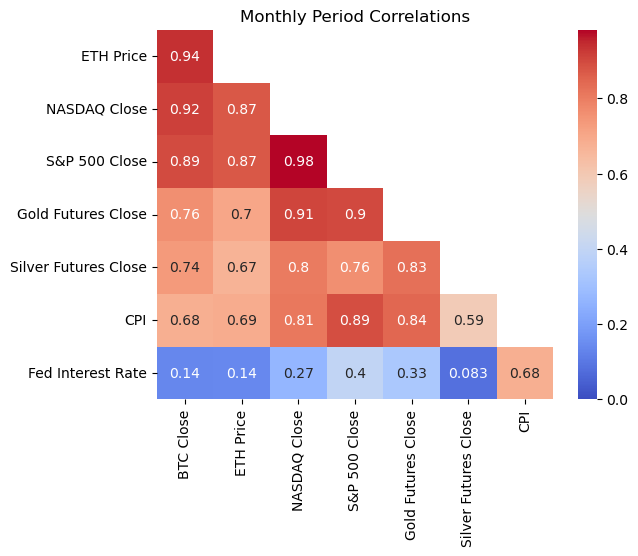

In [6]:
# use iloc to skip empty row & col from corr_triangle
cr.corr_heatmap(
    combined_monthly_corr.iloc[1:, :-1],
    "Monthly Period Correlations",
    vmin=0,
    cmap="coolwarm",
)